<html>
    <body>
        <b><pre><font size = 5>      DECIDING DISCOUNT RATES TO STOP CHURNING OF CUSTOMERS</font></pre></b>

<html>
    <body>
        <pre><font size = 2>                                           20 June 2021</font></pre>

## 1. Problem Statement

PowerCo is a major gas and electricity utility that supplies to corporate, SME (Small & Medium Enterprise), and residential customers. The power-liberalization of the energy market in Europe has led to significant customer churn, especially in the SME segment. They have partnered with BCG to help diagnose the source of churning SME customers.

One of the hypotheses under consideration is that churn is driven by the customers’ price sensitivities and that it is possible to predict customers likely to churn using a predictive model. The client also wants to try a discounting strategy, with the head of the SME division suggesting that offering customers at high propensity to churn a 20% discount might be effective.

The Lead Data Scientist (LDS) held an initial team meeting to discuss various hypotheses, including churn due to price sensitivity. After discussion with your team, you have been asked to go deeper on the hypothesis that the churn is driven by the customers’ price sensitivities. 

Your LDS wants an email with your thoughts on how the team should go about to test this hypothesis.



## 2. Email Statement Approach

<a href = 'https://docs.google.com/document/d/1SrXojxVpU9gPnZ9j7wJcUUrMFIDZu5Aja4SSchlnCYg/edit?usp=sharing'>Download the email here</a>

## 3. Data Cleaning and EDA

- **Loading data through pandas**
     - A. Pandas built-in functions
     - B. Printing to the screen specific areas of a dataframe
     - C. Combining two dataframes
- **General statistics of a dataframe**
     - A. Data types
     - B. Data statistics
     - C. Missing data
- **Data visualization**
     - A. Deep diving in specific parameters
     - B. Visualising variable distributions
- **Data cleaning**
     - A. Missing data / Empty values
     - B. Duplicates
- **Format/ Convert data**
     - A. Dates
     - B. Negative Data
     - C. Missing Data
- **Saving the data in pickle**

### 1. Loading data through pandas

In [4]:
# importing libraries
import pandas as pd
import numpy as np


train_data = pd.read_csv("ml_case_training_data.csv")
churn_data = pd.read_csv("ml_case_training_output.csv")
hist_data = pd.read_csv("ml_case_training_hist_data.csv")

In [7]:
# having a look at data
train_data.head(2)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648


In [8]:
churn_data.head(2)

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1


In [9]:
hist_data.head(2)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0


## Feature Description

|Feature name|Description|
|-------------|------------|
|id|contact id
|activity_new |  category of the company's activity
|campaign_disc_ele |code of the electricity campaign the customer last subscribed to
|channel_sales |code of the sales channel
|cons_12m |electricity consumption of the past 12 months
|cons_gas_12m| gas consumption of the past 12 months
|cons_last_month| electricity consumption of the last month
|date_activ |date of activation of the contract
|date_end |registered date of the end of the contract
|date_first_activ| date of first contract of the client
|date_modif_prod| date of last modification of the product
|date_renewal| date of the next contract renewal
|forecast_base_bill_ele|forecasted electricity bill baseline for next month
|forecast_base_bill_year| forecasted electricity bill baseline for calendar year
|forecast_bill_12m|forecasted electricity bill baseline for 12 months
|forecast_cons|forecasted electricity consumption for next month
|forecast_cons_12m| forecasted electricity consumption for next 12 months
|forecast_cons_year| forecasted electricity consumption for next calendar year
|forecast_discount_energy| forecasted value of current discount
|forecast_meter_rent_12m| forecasted bill of meter rental for the next 12 months
|forecast_price_energy_p1| forecasted energy price for 1st period
|forecast_price_energy_p2 |forecasted energy price for 2nd period
|forecast_price_pow_p1| forecasted power price for 1st period
|has_gas |indicated if client is also a gas client
|imp_cons |current paid consumption
|margin_gross_pow_ele| gross margin on power subscription
|margin_net_pow_ele| net margin on power subscription
|nb_prod_act| number of active products and services
|net_margin|total net margin
|num_years_antig| antiquity of the client (in number of years)
|origin_up |code of the electricity campaign the customer first subscribed to
|pow_max |subscribed power
|price_date |reference date
|price_p1_var  |price of energy for the 1st period
|price_p2_var |price of energy for the 2nd period
|price_p3_var |price of energy for the 3rd period
|price_p1_fix |price of power for the 1st period
|price_p2_fix |price of power for the 2nd period
|price_p3_fix |price of power for the 3rd period
|churned |has the client churned over the next 3 months

In [11]:
# merging the data for easier analysis
f_data = pd.merge(train_data,churn_data,on = 'id')

In [12]:
f_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

# Data Cleaning
## Analysis of Missing values

In [4]:
import missingno as ms
import matplotlib.pyplot as plt
import seaborn as sns

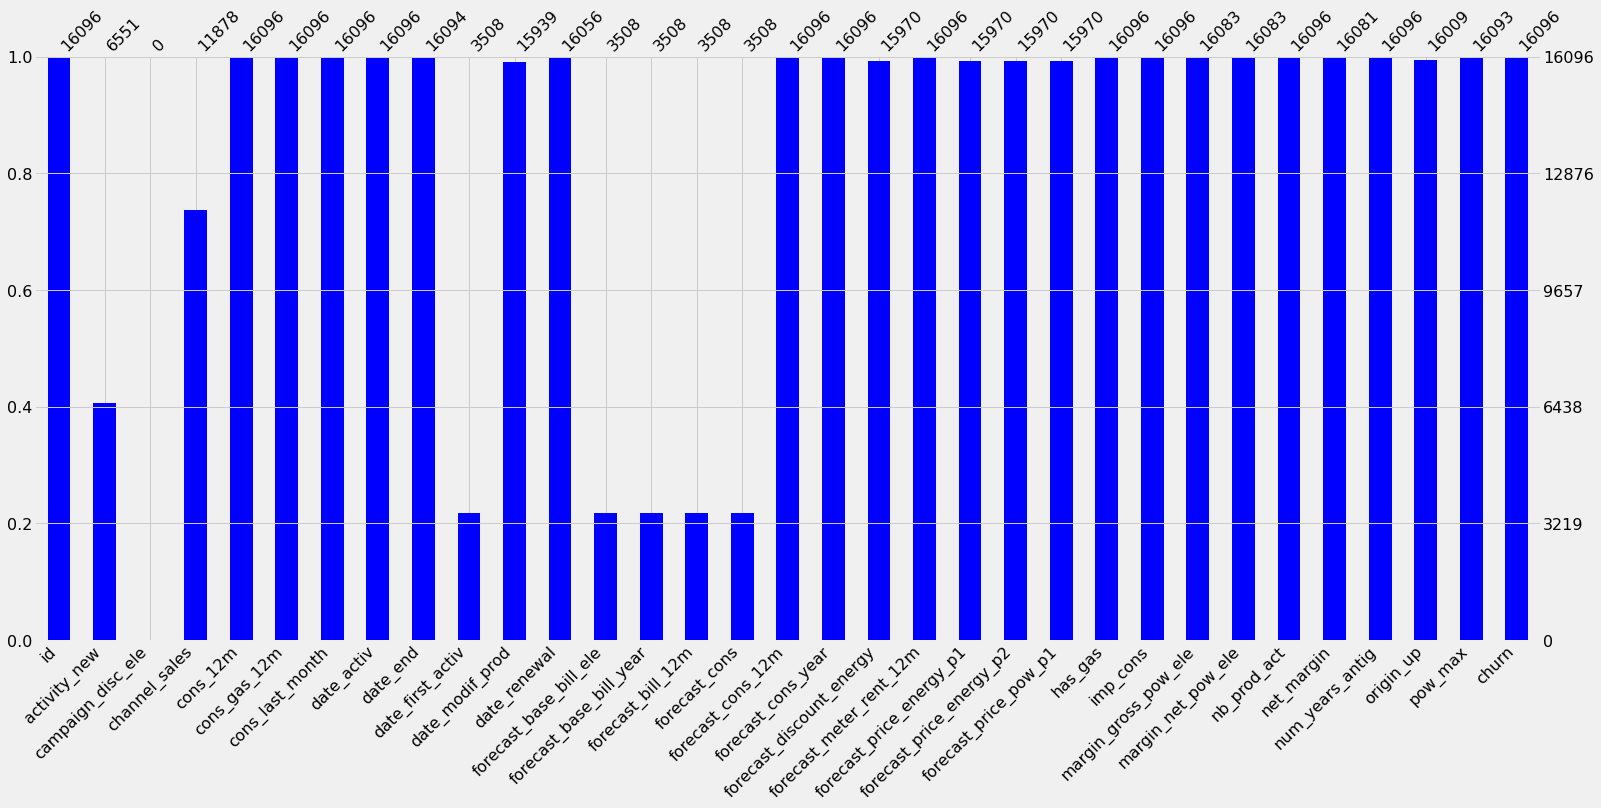

In [5]:
plt.style.use("fivethirtyeight")
fig1 = ms.bar(f_data,color = "blue")

<AxesSubplot:>

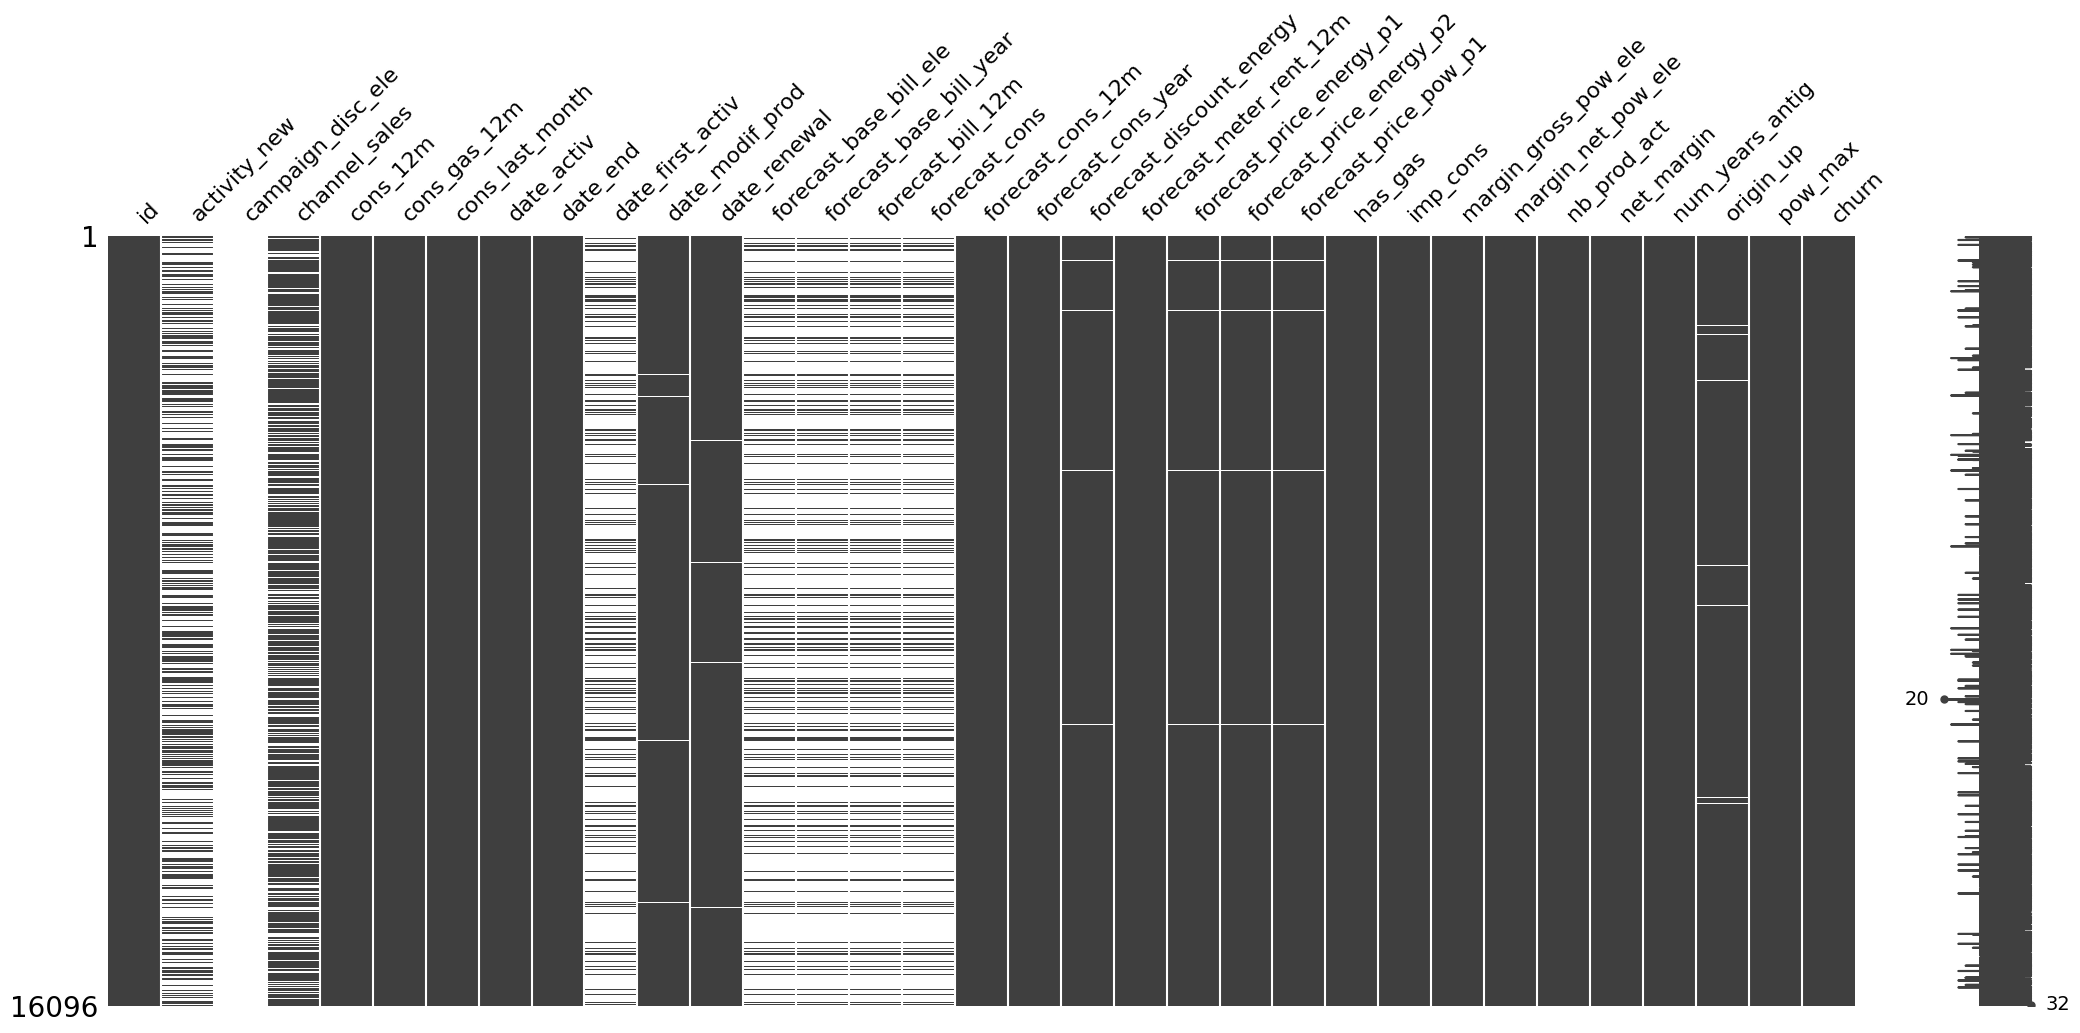

In [6]:
plt.style.use('default')
ms.matrix(f_data)

<AxesSubplot:>

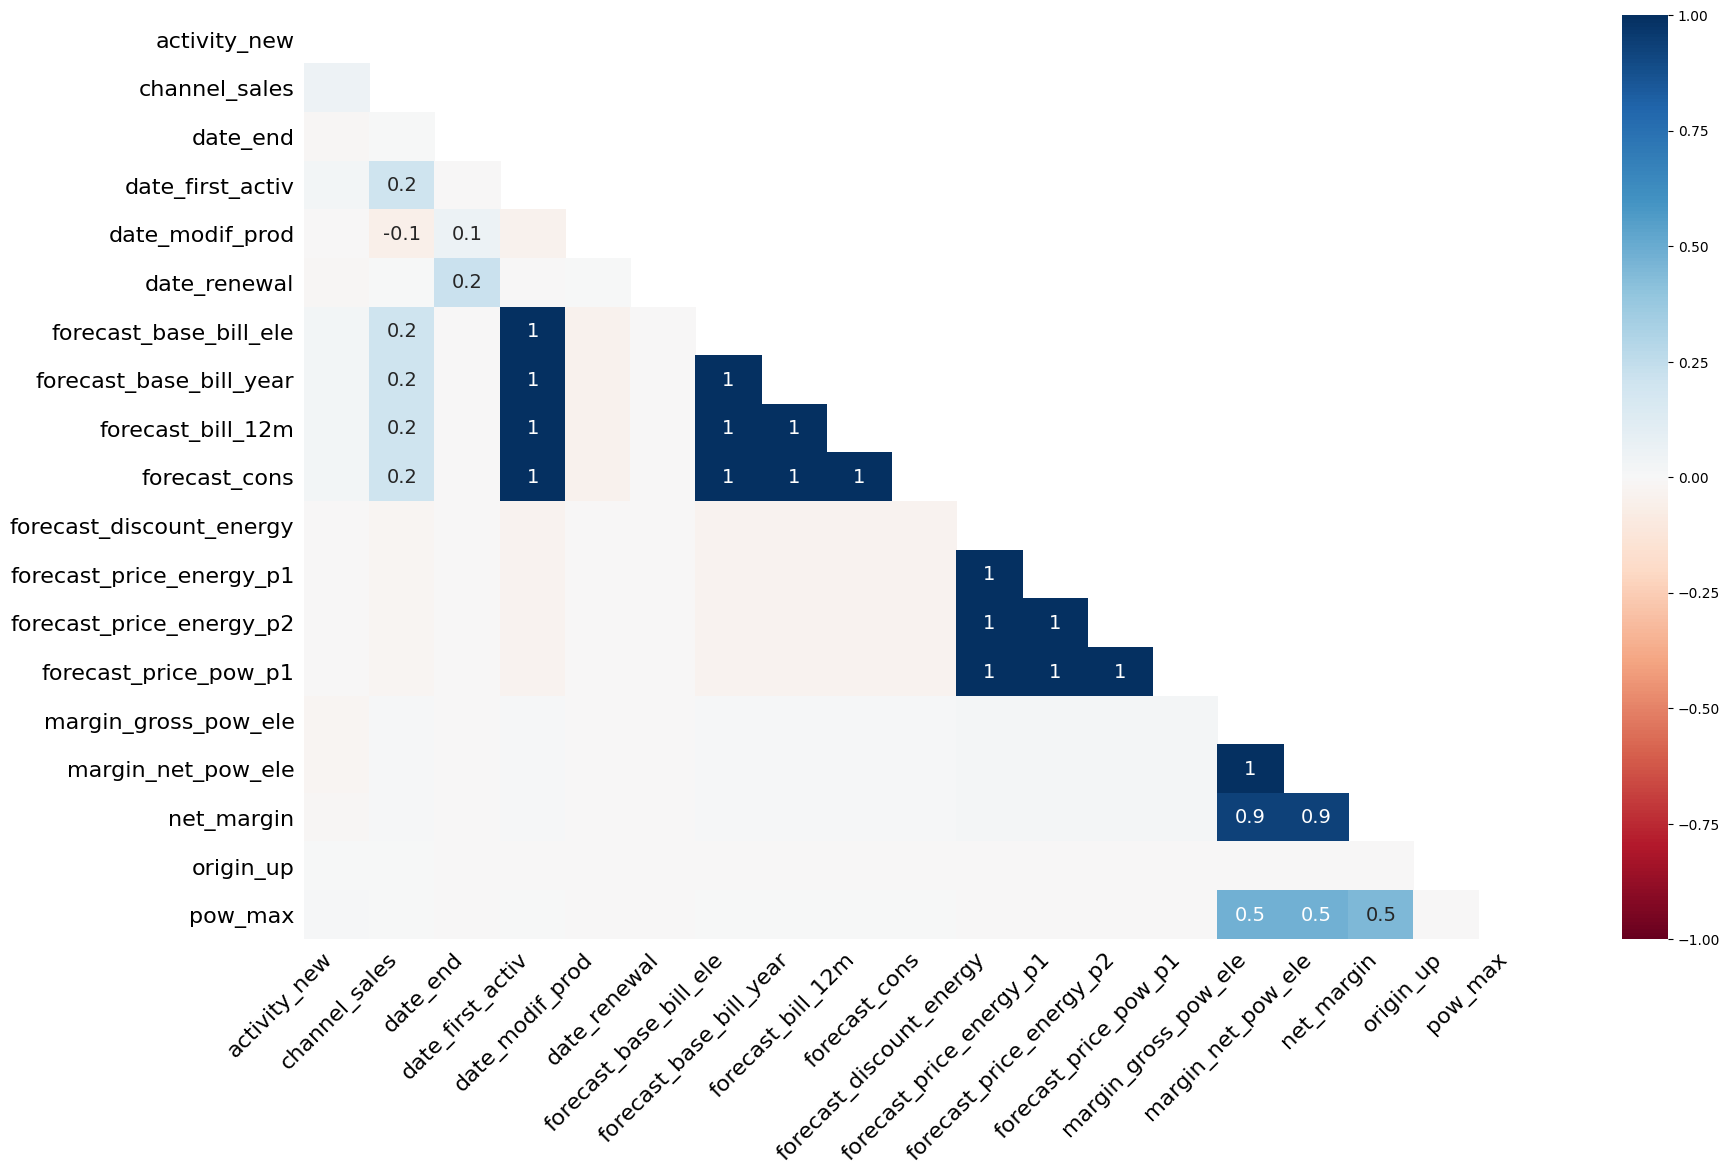

In [7]:
ms.heatmap(f_data)

## Insights:
1. We have a variable "campaign-disc-ele" which all the values as Nan. Since it has no values and hence so shows no relation to data, we have to drop the varaible.

2. We see that all the forecast  variables have sparse value and frequent missing values.

3. forecast _discount_energy  and price energy variables have values that have some correlation. we can also see that they have missing vlaues in same place. so they contain missing values that are not missing at random.
 
4. We have a variable date_modif_prod , date_renewal , origin up that contains values missing at random and have no relation with any other varible for missingness.

## Imputing missing values.

In [8]:
"""We have dropped campaign_disc_ele because it have all the values as none."""
f_data.drop("campaign_disc_ele",axis = 1, inplace = True)

### activity_new

In [9]:
"""It will be feasible to fill the activity_new variable with the activity that is mostly done by the company. """
f_data["activity_new"].fillna(0,inplace = True)
f_data["activity_new"].replace(0,"apdekpcbwosbxepsfxclislboipuxpop",inplace = True)

### channel_sales

In [10]:
f_data["channel_sales"].fillna(0,inplace = True)
f_data["channel_sales"].replace(0,"foosdfpfkusacimwkcsosbicdxkicaua ",inplace = True)

### Large number of missing values
date_first_activ 
forecast_base_bill_ele     
forecast_base_bill_year    
forecast_bill_12m          
forecast_cons 

These values have large no. of missing values (78% almost), so it will be better for us to drop these columns.

In [11]:
f_data.drop(["date_first_activ" ,"forecast_base_bill_ele",
"forecast_base_bill_year",
"forecast_bill_12m",
"forecast_cons"],axis = 1,inplace = True)

In [12]:
f_data.isnull().sum()

id                            0
activity_new                  0
channel_sales                 0
cons_12m                      0
cons_gas_12m                  0
cons_last_month               0
date_activ                    0
date_end                      2
date_modif_prod             157
date_renewal                 40
forecast_cons_12m             0
forecast_cons_year            0
forecast_discount_energy    126
forecast_meter_rent_12m       0
forecast_price_energy_p1    126
forecast_price_energy_p2    126
forecast_price_pow_p1       126
has_gas                       0
imp_cons                      0
margin_gross_pow_ele         13
margin_net_pow_ele           13
nb_prod_act                   0
net_margin                   15
num_years_antig               0
origin_up                    87
pow_max                       3
churn                         0
dtype: int64

In [13]:
f_data["date_modif_prod"].fillna("2015-11-01",inplace = True)
f_data["date_renewal"].fillna("2015-06-23",inplace = True)

### Forecasted missing values.

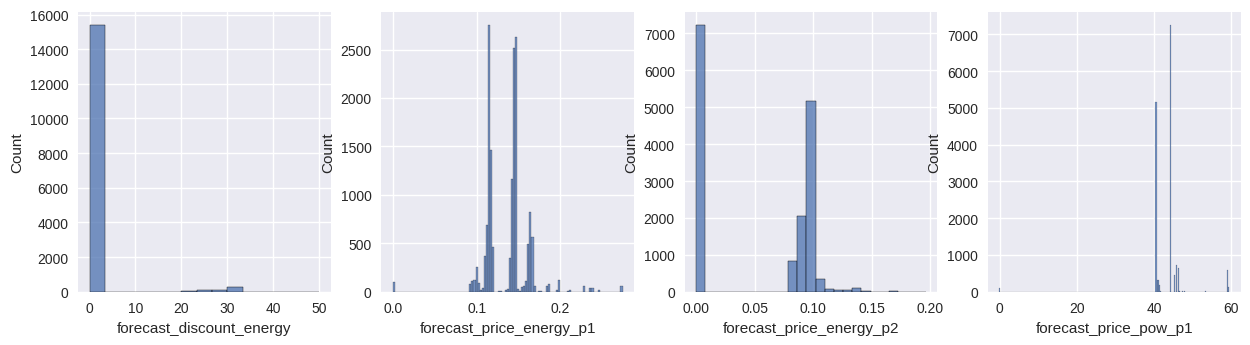

In [14]:
plt.figure(figsize=(15,8))
plt.style.use("seaborn")
for a,b in zip([1,2,3,4],["forecast_discount_energy","forecast_price_energy_p1","forecast_price_energy_p2","forecast_price_pow_p1"]):
    plt.subplot(2,4,a)
    sns.histplot(f_data[b])
    plt.xlabel(b)

We Discover that :
1. forecast_discount_energy is mainly a discrete variable with mostly values ranging in 1-10. So it will be good that if we fill the missing values in this variable with mode of the variable.
2. Other variables are mostly continous and hence it should be good to do linear interpolation in these variables.

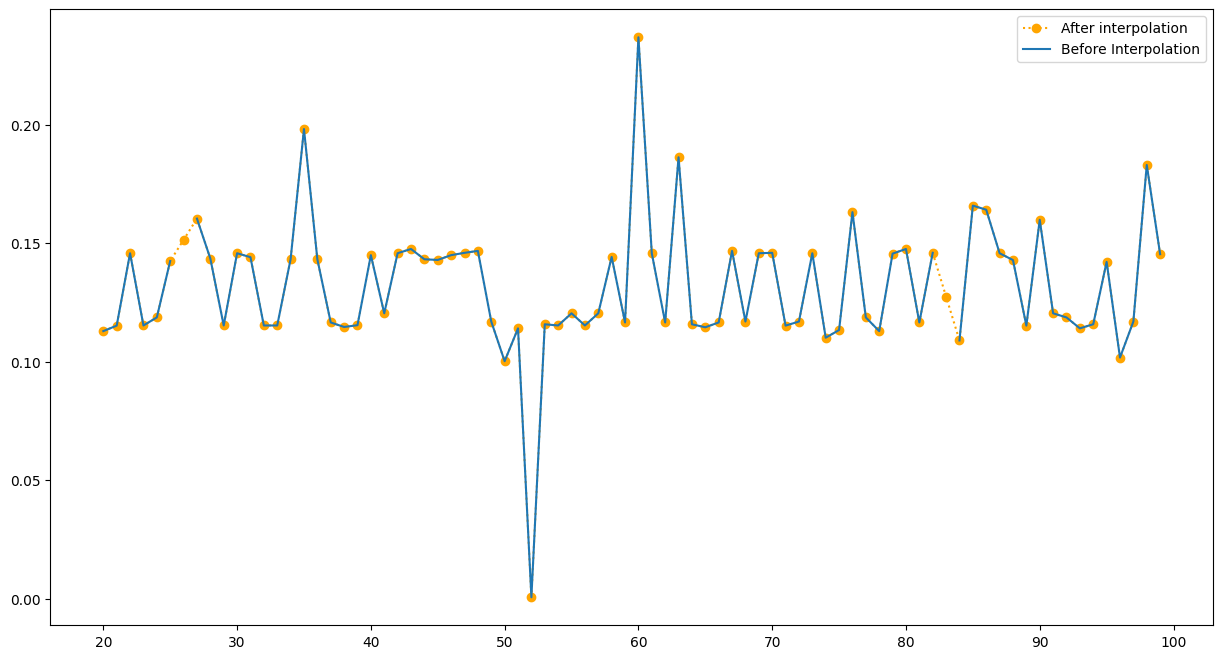

In [15]:
plt.style.use("default")
plt.figure(figsize=(15,8))
f_data["forecast_price_energy_p1"].interpolate(method="linear")[20:100].plot(color="orange",linestyle="dotted",marker="o",label="After interpolation")
f_data["forecast_price_energy_p1"][20:100].plot(label="Before Interpolation")
plt.legend()

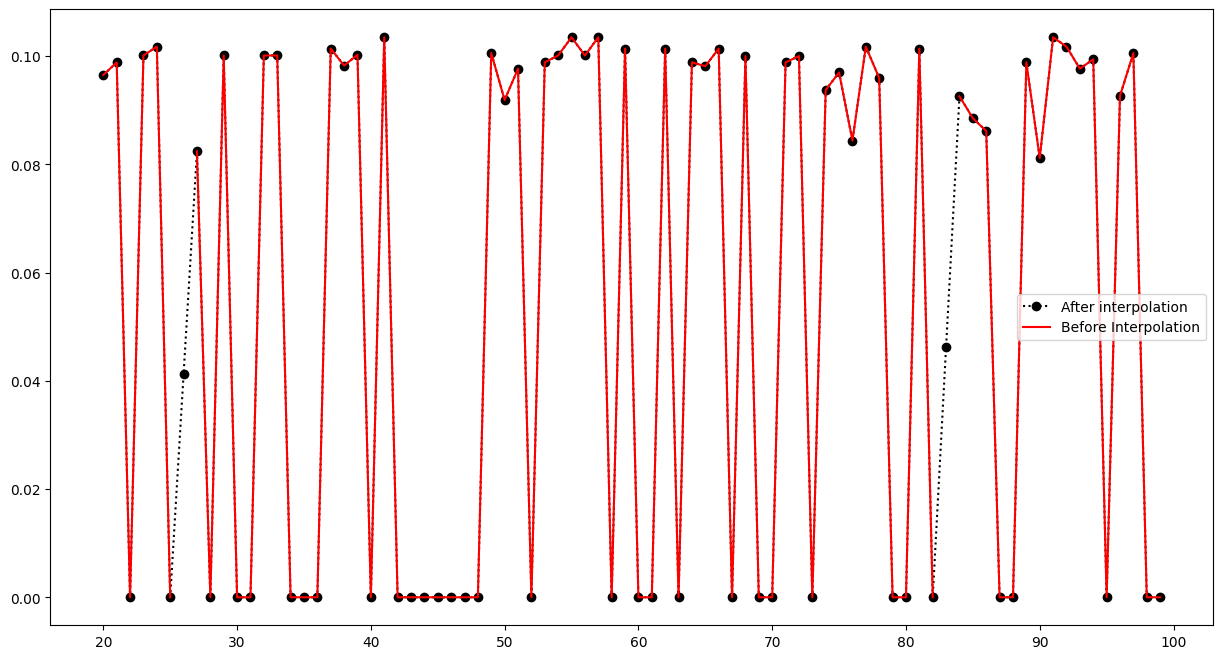

In [16]:
plt.style.use("default")
plt.figure(figsize=(15,8))
f_data["forecast_price_energy_p2"].interpolate(method="linear")[20:100].plot(color="black",linestyle="dotted",marker="o",label="After interpolation")
f_data["forecast_price_energy_p2"][20:100].plot(color="red",label="Before Interpolation")
plt.legend()

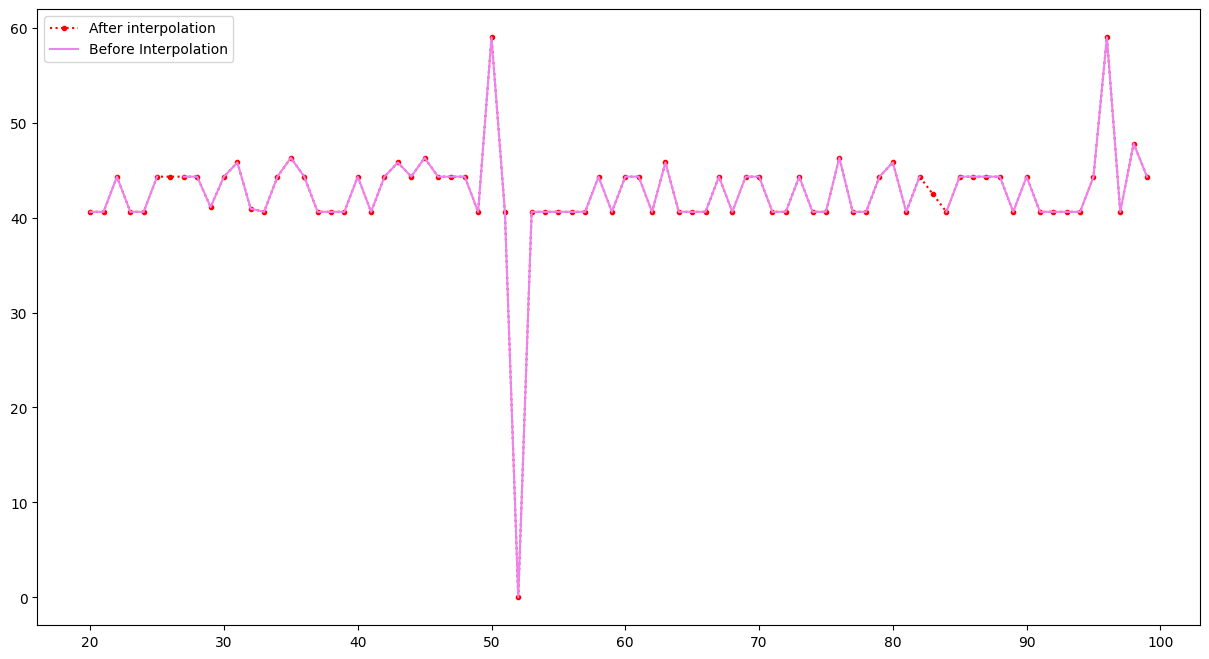

In [17]:
plt.style.use("default")
plt.figure(figsize=(15,8))
f_data["forecast_price_pow_p1"].interpolate(method="linear")[20:100].plot(color="red",linestyle="dotted",marker=".",label="After interpolation")
f_data["forecast_price_pow_p1"][20:100].plot(color="violet",label="Before Interpolation")
plt.legend()

We see that interpolating is filling the gaps in the original column nicely hence , interpolation will be a better idea.

In [18]:
f_data["forecast_discount_energy"].fillna(0,inplace = True)

In [19]:
f_data["forecast_price_pow_p1"] = f_data["forecast_price_pow_p1"].interpolate(method="linear")
f_data["forecast_price_energy_p2"] = f_data["forecast_price_energy_p2"].interpolate(method="linear")
f_data["forecast_price_energy_p1"] = f_data["forecast_price_energy_p1"].interpolate(method="linear")

In [20]:
f_data.isnull().sum()

id                           0
activity_new                 0
channel_sales                0
cons_12m                     0
cons_gas_12m                 0
cons_last_month              0
date_activ                   0
date_end                     2
date_modif_prod              0
date_renewal                 0
forecast_cons_12m            0
forecast_cons_year           0
forecast_discount_energy     0
forecast_meter_rent_12m      0
forecast_price_energy_p1     0
forecast_price_energy_p2     0
forecast_price_pow_p1        0
has_gas                      0
imp_cons                     0
margin_gross_pow_ele        13
margin_net_pow_ele          13
nb_prod_act                  0
net_margin                  15
num_years_antig              0
origin_up                   87
pow_max                      3
churn                        0
dtype: int64

### margin_ values

We have comparatively less values in variables margin_gross_pow_ele,margin_net_pow_ele,net_margin,pow_max and date_end. So it will be better if we fill the values using ffill in these variables.

In [21]:
f_data["margin_gross_pow_ele"].fillna(method = "ffill",inplace = True)
f_data["margin_net_pow_ele"].fillna(method = "ffill",inplace = True)
f_data["net_margin"].fillna(method = "ffill", inplace = True)
f_data["pow_max"].fillna(method = "ffill", inplace = True)
f_data["date_end"].fillna(method = "ffill",inplace = True)

## Origin_up

For the variable it will be good to impute maximum occuring values.

In [22]:
f_data["origin_up"].fillna(0,inplace = True)
f_data["origin_up"].replace(0,"lxidpiddsbxsbosboudacockeimpuepw",inplace = True)

In [23]:
f_data.isnull().sum()

id                          0
activity_new                0
channel_sales               0
cons_12m                    0
cons_gas_12m                0
cons_last_month             0
date_activ                  0
date_end                    0
date_modif_prod             0
date_renewal                0
forecast_cons_12m           0
forecast_cons_year          0
forecast_discount_energy    0
forecast_meter_rent_12m     0
forecast_price_energy_p1    0
forecast_price_energy_p2    0
forecast_price_pow_p1       0
has_gas                     0
imp_cons                    0
margin_gross_pow_ele        0
margin_net_pow_ele          0
nb_prod_act                 0
net_margin                  0
num_years_antig             0
origin_up                   0
pow_max                     0
churn                       0
dtype: int64

### hence now there are no missing values.

## Date variables

In [24]:
f_data["date_activ"] = pd.to_datetime(f_data["date_activ"])
f_data["date_end"] = pd.to_datetime(f_data["date_end"])
f_data["date_modif_prod"] = pd.to_datetime(f_data["date_modif_prod"])
f_data["date_renewal"] = pd.to_datetime(f_data["date_renewal"])

In [25]:
f_data["churn"] = f_data["churn"].astype('category')

In [26]:
f_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id                        16096 non-null  object        
 1   activity_new              16096 non-null  object        
 2   channel_sales             16096 non-null  object        
 3   cons_12m                  16096 non-null  int64         
 4   cons_gas_12m              16096 non-null  int64         
 5   cons_last_month           16096 non-null  int64         
 6   date_activ                16096 non-null  datetime64[ns]
 7   date_end                  16096 non-null  datetime64[ns]
 8   date_modif_prod           16096 non-null  datetime64[ns]
 9   date_renewal              16096 non-null  datetime64[ns]
 10  forecast_cons_12m         16096 non-null  float64       
 11  forecast_cons_year        16096 non-null  int64         
 12  forecast_discount_

Now our data is cleaned , Heading to EDA next.

In [92]:
f_data.to_csv("Final_data1.csv")

# EDA

### Consumption in last 12 months

/home/db/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/db/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


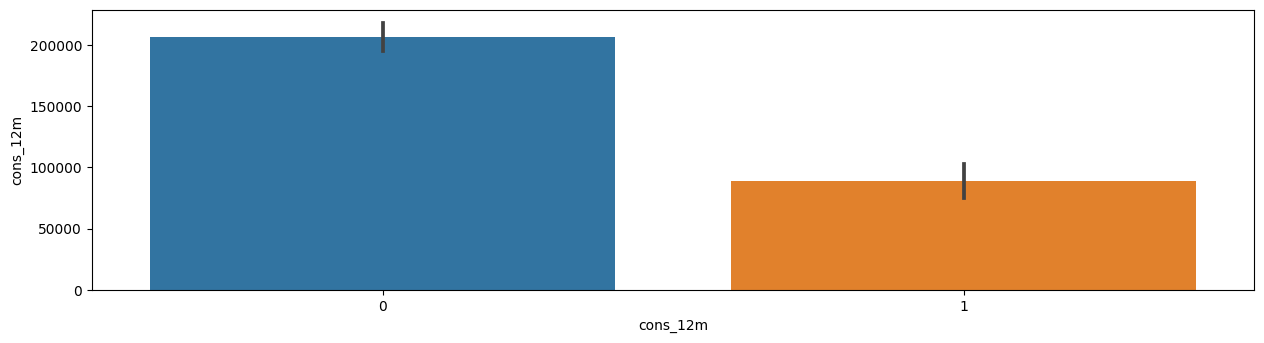

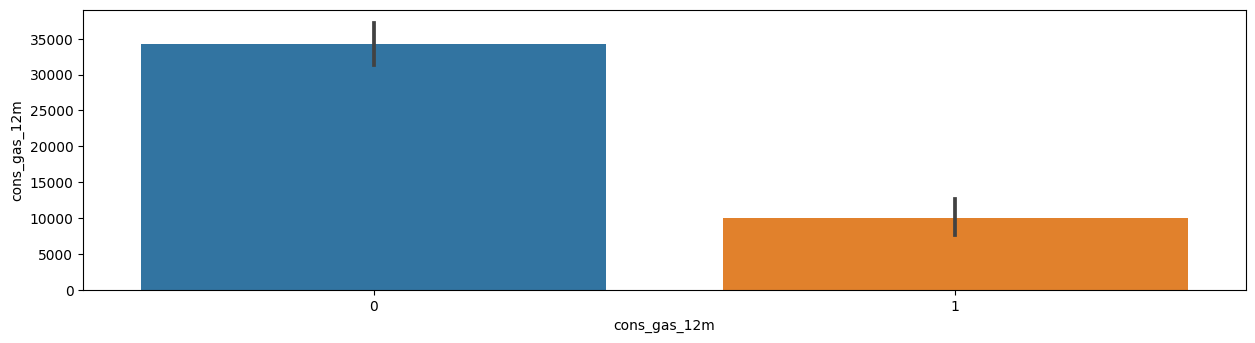

In [27]:
for i,b in zip([1,2],["cons_12m","cons_gas_12m"]):
    plt.figure(figsize=(15,8))
    plt.subplot(2,1,i)
    sns.barplot(f_data["churn"],f_data[b])
    plt.xlabel(b)

We see that people who have more consumption of gas and electricity in past 12 months did not churned and those with 
less consumption churned.

--------------------------------------------------------------------------------------------------------------

## Average Retention Period of Customers

In [28]:
f_data["rp"] = (f_data["date_activ"]-f_data["date_end"]).astype("str")
lists = []
for i in f_data["rp"]:
    lists.append(i[1:5])
f_data["rp"] = pd.Series(lists)
f_data["rp"].astype("int").mean()

2018.1129473161034

# 2018 days
  is average retention period of customers.

--------------------------------------------------------------------------------------------------------------

## Gas Clients

/home/db/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Not a gas Client')

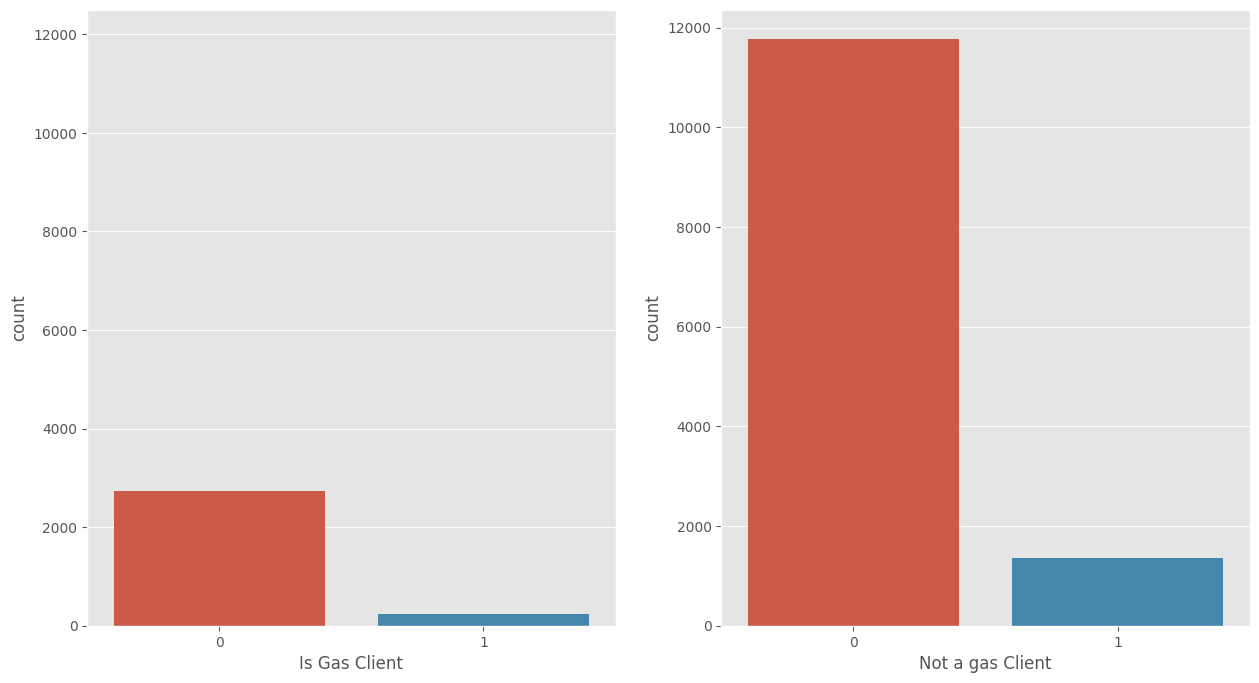

In [29]:
plt.figure(figsize=(15,8))
plt.style.use("ggplot")
plt.subplot(1,2,1)
sns.countplot(f_data[f_data["has_gas"]=="t"]["churn"])
plt.xlabel("Is Gas Client")
plt.ylim(0,12500)
plt.subplot(1,2,2)
sns.countplot(f_data[f_data["has_gas"]=="f"]["churn"])
plt.xlabel("Not a gas Client")

Those who were gas clients churned less, than those who were not gas clients.

--------------------------------------------------------------------------------------------------------------

## Antiquity of Customers

<AxesSubplot:>

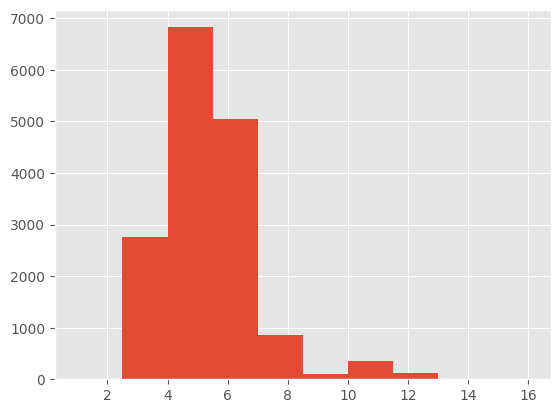

In [39]:
f_data["num_years_antig"].hist()

In [43]:
f_data[f_data["churn"]==1]["num_years_antig"].max()
f_data[f_data["churn"]==0]["num_years_antig"].max()

16

# 4 years                                                                                 
customers who had 4 years of antiquity churned.            

# 5 years
customers who had 5 years of antiquity did not churned.

**Hence we can say that customers who were customers of the company for larger time (> 3-4 years) remained with the company and did not churned.**

--------------------------------------------------------------------------------------------------------------

## Which Electricity Campaign lost more customers?

In [53]:
f_data[f_data["churn"]==1].groupby("origin_up").count()["churn"]

origin_up
kamkkxfxxuwbdslkwifmmcsiusiuosws     265
ldkssxwpmemidmecebumciepifcamkci     315
lxidpiddsbxsbosboudacockeimpuepw    1015
Name: churn, dtype: int64

# 1015 
no. of customers is max number of customers lost by electricity campaign - "lxidpiddsbxsbosboudacockeimpuepw"

--------------------------------------------------------------------------------------------------------------

## Subscribed Power

<AxesSubplot:xlabel='churn'>

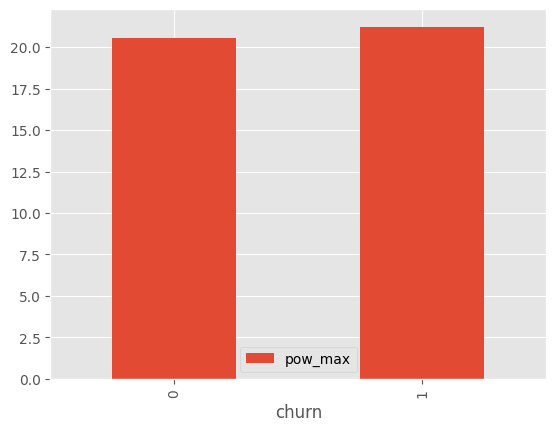

In [60]:
f_data[["pow_max","churn"]].groupby("churn").mean().plot(kind = "bar")

Those who subscribed to more power churned more than those who have subsribed less power , however the difference was not much.

--------------------------------------------------------------------------------------------------------------

# Margin on Subscription

array([<AxesSubplot:title={'center':'margin_net_pow_ele'}, xlabel='churn'>],
      dtype=object)

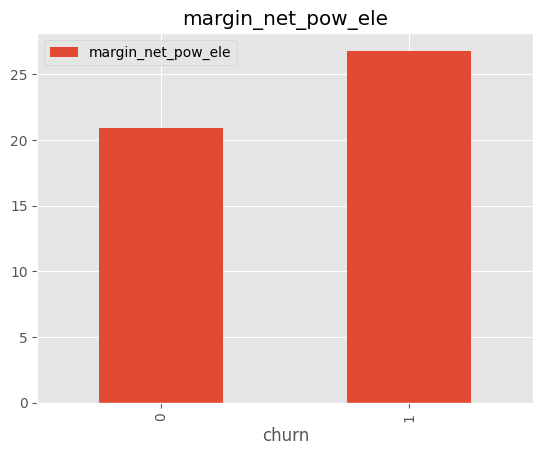

In [71]:
f_data[["margin_net_pow_ele","churn"]].groupby("churn").mean().plot(kind="bar",subplots= True)

Those with higher margin on power subscription had churned more.

--------------------------------------------------------------------------------------------------------------

## History Data

In [74]:
hist_data = pd.read_csv("ml_case_training_hist_data.csv")

In [81]:
hist_data.head(3)

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [82]:
hist_data["price_date"] = pd.to_datetime(hist_data["price_date"])

In [90]:
hist_data[hist_data["price_p3_fix"]<0]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
23138,951d99fe07ca94c2139f43bc37095139,2015-03-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166
28350,f7bdc6fa1067cd26fd80bfb9f3fca28f,2015-03-01,0.131032,0.108896,0.076955,-0.162916,-0.097749,-0.065166
98575,9b523ad5ba8aa2e524dcda5b3d54dab2,2015-02-01,0.129444,0.106863,0.075004,-0.162916,-0.097749,-0.065166
113467,cfd098ee6c567eb32374c77d20571bc7,2015-02-01,0.123086,0.100505,0.068646,-0.162916,-0.097749,-0.065166
118467,51d7d8a0bf6b8bd94f8c1de7942c66ea,2015-07-01,0.128132,0.105996,0.074056,-0.162912,-0.097752,-0.065172
125819,decc0a647016e183ded972595cd2b9fb,2015-03-01,0.124937,0.102814,0.069071,-0.162916,-0.097749,-0.065166
128761,cc214d7c05de3ee17a7691e274ac488e,2015-06-01,0.124675,0.102539,0.070596,-0.162912,-0.097752,-0.065172
160827,395a6f41bbd1a0f23a64f00645264e78,2015-04-01,0.121352,0.098771,0.066912,-0.162916,-0.097749,-0.065166
181811,d4a84ff4ec620151ef05bdef0cf27eab,2015-05-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166


We have negative values here. hence replacing them with median.

In [91]:
hist_data.loc[hist_data["price_p1_fix"] < 0,"price_p1_fix"] = hist_data["price_p1_fix"].median()
hist_data.loc[hist_data["price_p2_fix"] < 0,"price_p2_fix"] = hist_data["price_p2_fix"].median()
hist_data.loc[hist_data["price_p3_fix"] < 0,"price_p3_fix"] = hist_data["price_p3_fix"].median()

In [93]:
hist_data.to_csv("final_data2.csv")